In [2]:
! pip install mlflow -q

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dataproc-jupyter-plugin 0.1.79 requires pydantic~=1.10.0, but you have pydantic 2.9.2 which is incompatible.
kfp 2.5.0 requires google-cloud-storage<3,>=2.2.1, but you have google-cloud-storage 1.44.0 which is incompatible.


# Import Libraries

In [3]:
import mlflow
import mlflow.sklearn
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
from sklearn.ensemble import HistGradientBoostingClassifier


# Load your dataset

In [4]:
data = pd.read_csv('/kaggle/input/space-y-dataset/dataset_part_2.csv')
X = pd.read_csv('/kaggle/input/space-y-dataset/dataset_part_3.csv')

In [5]:
print(data.columns)

Index(['FlightNumber', 'Date', 'BoosterVersion', 'PayloadMass', 'Orbit',
       'LaunchSite', 'Outcome', 'Flights', 'GridFins', 'Reused', 'Legs',
       'LandingPad', 'Block', 'ReusedCount', 'Serial', 'Longitude', 'Latitude',
       'Class', 'Year'],
      dtype='object')


In [6]:
Y = data['Class'].to_numpy()

# Standardize the features

In [7]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and test sets, maintaining class distribution

In [8]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,random_state=2, stratify=Y)

In [9]:
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Display class distribution in training and test sets

In [10]:
print(pd.Series(Y_train).value_counts())
print(pd.Series(Y_test).value_counts())

1    48
0    24
Name: count, dtype: int64
1    12
0     6
Name: count, dtype: int64


# Setting up cross-validation strategy

In [11]:
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=2)

In [12]:

# Define and train the model
params = {
    'Decision Tree': {
        'classifier': DecisionTreeClassifier(),
        'param_grid': {
            'criterion': ['gini', 'entropy'],
            'splitter': ['best', 'random'],
            'max_depth': [2 * n for n in range(1, 10)],
            'max_features': ['sqrt'],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 5, 10],
            'class_weight': [None, 'balanced'],
            'ccp_alpha': np.linspace(0, 0.035, 10)
        }
    },
    'K-Nearest Neighbors': {
        'classifier': KNeighborsClassifier(),
        'param_grid': {
            'n_neighbors': list(range(1, 11)),
            'weights': ['uniform', 'distance'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'p': [1, 2],
            'leaf_size': list(range(20, 41, 5)),
            'n_jobs': [-1]
        }
    },
    'Logistic Regression': {
        'classifier': LogisticRegression(),
        'param_grid': {
            "C": [0.01, 0.1, 1],
            "penalty": ['l2'],
            "solver": ['lbfgs'],
            "fit_intercept": [True, False],
            "class_weight": [None, 'balanced'],
            "max_iter": [100, 200, 500],
            "tol": [1e-4, 1e-3, 1e-2],
            "multi_class": ['ovr', 'multinomial']
        }
    },
    'Support Vector Machine': {
        'classifier': SVC(),
        'param_grid': {
            'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'C': np.logspace(-3, 3, 5),
            'gamma': np.logspace(-3, 3, 5),
            'degree': [2, 3, 4],
            'coef0': np.linspace(-1, 1, 5),
            'shrinking': [True, False],
            'probability': [True, False]
        }
    }
}


In [13]:
# # Define and train the model
# params = {
#     'Decision Tree': {
#         'classifier': DecisionTreeClassifier(),
#         'param_grid': {
#             'criterion': ['gini', 'entropy'],
#             'splitter': ['best', 'random'],
#             'max_depth': [2 * n for n in range(1, 10)],
#             'max_features': ['sqrt'],
#             'min_samples_leaf': [1, 2, 4],
#             'min_samples_split': [2, 5, 10],
#             'class_weight': [None, 'balanced'],
#             'ccp_alpha': np.linspace(0, 0.035, 10)
#         }
#     },
#     'K-Nearest Neighbors': {
#         'classifier': KNeighborsClassifier(),
#         'param_grid': {
#             'n_neighbors': list(range(1, 11)),
#             'weights': ['uniform', 'distance'],
#             'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#             'p': [1, 2],
#             'leaf_size': list(range(20, 41, 5)),
#             'n_jobs': [-1]
#         }
#     },
#     'Logistic Regression': {
#         'classifier': LogisticRegression(),
#         'param_grid': {
#             "C": [0.01, 0.1, 1],
#             "penalty": ['l2'],
#             "solver": ['lbfgs'],
#             "fit_intercept": [True, False],
#             "class_weight": [None, 'balanced'],
#             "max_iter": [100, 200, 500],
#             "tol": [1e-4, 1e-3, 1e-2],
#             "multi_class": ['ovr', 'multinomial']
#         }
#     },
#     'Support Vector Machine': {
#         'classifier': SVC(),
#         'param_grid': {
#             'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
#             'C': np.logspace(-3, 3, 5),
#             'gamma': np.logspace(-3, 3, 5),
#             'degree': [2, 3, 4],
#             'coef0': np.linspace(-1, 1, 5),
#             'shrinking': [True, False],
#             'probability': [True, False]
#         }
#     }
# }
# model_names = []
# train_accuracies = []
# test_accuracies = []
# best_params_list = []
# for model_name, model_info in params.items():
#     model = model_info['classifier']
#     grid_search = GridSearchCV(model, model_info['param_grid'], cv=stratified_kfold)
    
#     grid_search.fit(X_train, Y_train)
    
#     model_names.append(model_name)
#     train_accuracies.append(grid_search.best_score_)
#     test_accuracies.append(grid_search.score(X_test, Y_test))
#     best_params_list.append(grid_search.best_params_)
# best_params = {name: params for name, params in zip(model_names, best_params_list)}
# with open('/kaggle/working/best_params.json', 'w') as f:
#     json.dump(best_params, f)
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))
# fig.suptitle('Confusion Matrices for Different Models', fontsize=16)

# for i, model_name in enumerate(model_names):
#     ax = axes.flatten()[i]
#     model = params[model_name]['classifier'].set_params(**best_params_list[i])
#     model.fit(X_train, Y_train)
    
#     predictions = model.predict(X_test)
#     cm = confusion_matrix(Y_test, predictions)

#     sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
#     ax.set_title(f'Confusion Matrix - {model_name}')
#     ax.set_xlabel('Predicted')
#     ax.set_ylabel('Actual')

# plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.show()
# results_df = pd.DataFrame({
#     'Model': model_names,
#     'Training Accuracy': train_accuracies,
#     'Test Accuracy': test_accuracies,
#     'Best Params': best_params_list
# })
# best_model_info = results_df.loc[results_df['Training Accuracy'].idxmax()]
# print(f"Best model: {best_model_info['Model']} with accuracy: {best_model_info['Training Accuracy']:.2f}")
# print(f"Best hyperparameters: {best_model_info['Best Params']}")
# plt.figure(figsize=(10, 5))
# sns.barplot(x='Model', y='Training Accuracy', data=results_df)
# plt.title('Model Accuracies Comparison')
# plt.xlabel('Model')
# plt.ylabel('Training Accuracy')
# plt.xticks(rotation=45)
# plt.show()
# final_model = DecisionTreeClassifier(
#     ccp_alpha=0.0194,
#     class_weight=None,
#     criterion='gini',
#     max_depth=16,
#     max_features='sqrt',
#     min_samples_leaf=1,
#     min_samples_split=10,
#     splitter='random'
# )
# final_model.fit(X_train, Y_train)
# final_test_accuracy = final_model.score(X_test, Y_test)
# print(f"Final Model Test Accuracy: {final_test_accuracy * 100:.2f}%")

In [14]:
model_names = []
train_accuracies = []
test_accuracies = []
best_params_list = []

In [15]:
for model_name, model_info in params.items():
    model = model_info['classifier']
    grid_search = GridSearchCV(model, model_info['param_grid'], cv=stratified_kfold)
    
    mlflow.end_run()  # End any existing run

In [16]:
for model_name, model_info in params.items():
    model = model_info['classifier']
    grid_search = GridSearchCV(model, model_info['param_grid'], cv=stratified_kfold)
    
    with mlflow.start_run(run_name=model_name):  # Start an MLflow run
        grid_search.fit(X_train, Y_train)
        
        model_names.append(model_name)
        train_accuracy = grid_search.best_score_
        test_accuracy = grid_search.score(X_test, Y_test)
        
        train_accuracies.append(grid_search.best_score_)
        test_accuracies.append(grid_search.score(X_test, Y_test))
        best_params_list.append(grid_search.best_params_)
        
        # Log parameters and metrics
        best_params = {name: params for name, params in zip(model_names, best_params_list)}
        mlflow.log_params(best_params)  # Log hyperparameters
        mlflow.log_metric("train_accuracy", train_accuracy)  # Log training accuracy
        mlflow.log_metric("test_accuracy", test_accuracy)    # Log test accuracy
        
        # Log the model
        mlflow.sklearn.log_model(grid_search.best_estimator_, "model")
    

2024/10/18 20:35:15 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmpp303rw6r/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.2.2', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
2024/10/18 20:35:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/10/18 20:36:36 WARNING mlflow.utils.environment: Encountered an unexpected error while inferring pip requirements (model URI: /tmp/tmp9ahpasgu/model/model.pkl, flavor: sklearn). Fall back to return ['scikit-learn==1.2.2', 'cloudpickle==3.0.0']. Set logging level to DEBUG to see the full traceback. 
2024/10/18 20:36:36 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature

In [17]:
# best_params = {name: params for name, params in zip(model_names, best_params_list)}

# Save best parameters to a file (if needed)
with open('/kaggle/working/best_params.json', 'w') as f:
    json.dump(best_params, f)

# Plot confusion matrices for each model

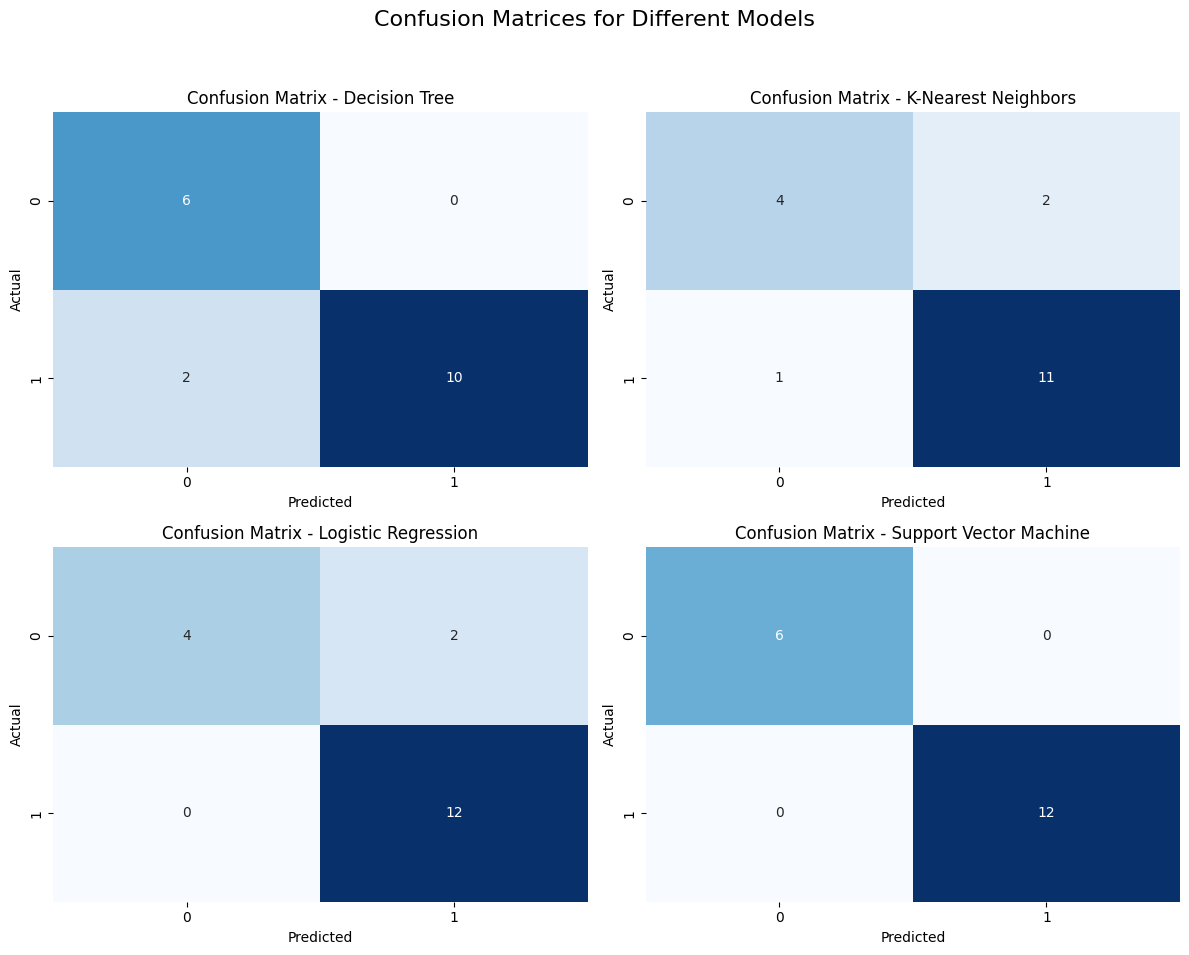

In [18]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('Confusion Matrices for Different Models', fontsize=16)

for i, model_name in enumerate(model_names[:4]):
    ax = axes.flatten()[i]
    model = params[model_name]['classifier'].set_params(**best_params_list[i])
    model.fit(X_train, Y_train)
    
    predictions = model.predict(X_test)
    cm = confusion_matrix(Y_test, predictions)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Compile results into a DataFrame for analysis

In [19]:
results_df = pd.DataFrame({
    'Model': model_names,
    'Training Accuracy': train_accuracies,
    'Test Accuracy': test_accuracies,
    'Best Params': best_params_list
})

# Identify and print the best-performing model

In [20]:
best_model_info = results_df.loc[results_df['Training Accuracy'].idxmax()]
print(f"Best model: {best_model_info['Model']} with accuracy: {best_model_info['Training Accuracy']:.2f}")
print(f"Best hyperparameters: {best_model_info['Best Params']}")

Best model: Decision Tree with accuracy: 1.00
Best hyperparameters: {'ccp_alpha': 0.007777777777777778, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'best'}


# Visualize model accuracies

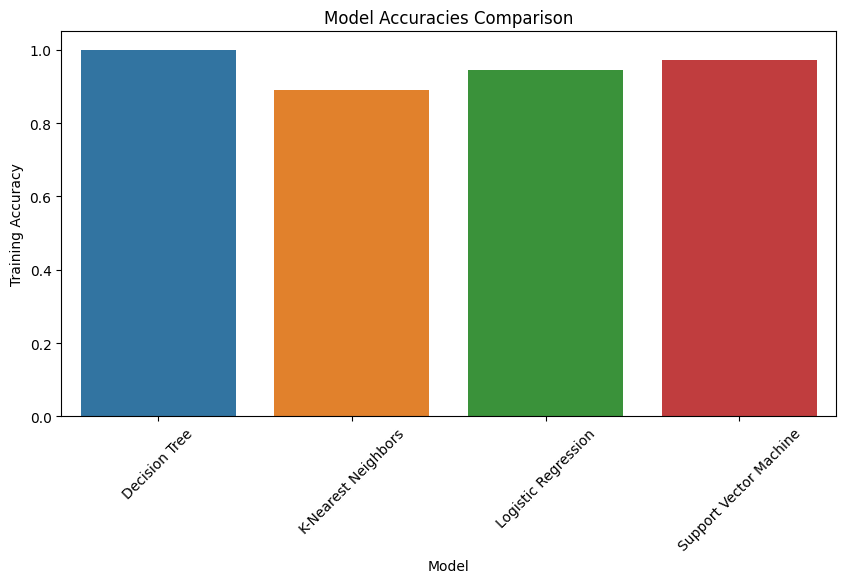

In [21]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Model', y='Training Accuracy', data=results_df)
plt.title('Model Accuracies Comparison')
plt.xlabel('Model')
plt.ylabel('Training Accuracy')
plt.xticks(rotation=45)
plt.show()

# Final model training with best hyperparameters

In [32]:
final_model = DecisionTreeClassifier(
    ccp_alpha=0.0194,
    class_weight=None,
    criterion='gini',
    max_depth=16,
    max_features='sqrt',
    min_samples_leaf=1,
    min_samples_split=10,
    splitter='random'
)

# Train final model on the full training data

In [33]:
final_model.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0194, max_depth=16, max_features='sqrt',
                       min_samples_split=10, splitter='random')

# Evaluate final model on test set

In [34]:
final_test_accuracy = final_model.score(X_test, Y_test)
print(f"Final Model Test Accuracy: {final_test_accuracy * 100:.2f}%")

Final Model Test Accuracy: 94.44%


In [25]:
# !mlflow ui --port 5000

[2024-10-18 20:40:00 +0000] [28156] [INFO] Starting gunicorn 23.0.0
[2024-10-18 20:40:00 +0000] [28156] [INFO] Listening at: http://127.0.0.1:5000 (28156)
[2024-10-18 20:40:00 +0000] [28156] [INFO] Using worker: sync
[2024-10-18 20:40:00 +0000] [28157] [INFO] Booting worker with pid: 28157
[2024-10-18 20:40:00 +0000] [28158] [INFO] Booting worker with pid: 28158
[2024-10-18 20:40:00 +0000] [28159] [INFO] Booting worker with pid: 28159
[2024-10-18 20:40:00 +0000] [28160] [INFO] Booting worker with pid: 28160
^C
[2024-10-18 20:41:44 +0000] [28156] [INFO] Handling signal: int
[2024-10-18 20:41:44 +0000] [28158] [INFO] Worker exiting (pid: 28158)
[2024-10-18 20:41:44 +0000] [28160] [INFO] Worker exiting (pid: 28160)
[2024-10-18 20:41:44 +0000] [28159] [INFO] Worker exiting (pid: 28159)
[2024-10-18 20:41:44 +0000] [28157] [INFO] Worker exiting (pid: 28157)
